<img src="utils/mediapipelogo.png" width="700" height="100">

# HandPose in MediaPipe

In [1]:
# Importing necessary libraries

import mediapipe as mp
import numpy as np
import cv2
import uuid
import os

In [3]:
# Loading the Hands model and drawing_utils to draw the detections

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

# MediaPipe Hand model

<img src ="utils/hand_landmarks.png" style="height:350px">

# Detecting and showing the output using webcam feed

In [107]:
os.mkdir('Output Images') # Creating empty folder in current directory (Optional)

In [10]:
cap = cv2.VideoCapture(0)

with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5, max_num_hands=6) as hands:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB 
        image = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        
        # flipping the image
        image = cv2.flip(image, 1)
        
        # setting flags for optimization purpose
        image.flags.writeable = False
        
        # passing to mediapipe for detections
        results = hands.process(image)
        
        # setting flags for optimization purpose
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # printing results to analyze the type of output(optional)
        # print(results.multi_hand_landmarks)
        
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS,
                                         mp_drawing.DrawingSpec(color=(250, 22, 76), thickness=2, circle_radius=4),
                                         mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=4))
        
        
        cv2.imshow('Hand Pose', image)
        
        # Save the image frames into one folder named Output Images
#         cv2.imwrite(
#             os.path.join('Output Images','{}.jpg'.format(uuid.uuid1())), image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break



# Releasing the webcam after quitting!
cap.release()
cv2.destroyAllWindows()
   

In [ ]:
results.multi_hand_landmarks

In [6]:
mp_drawing.draw_landmarks??

In [12]:
str(uuid.uuid1()) # this uuid will just generate a unique string value wich can be used when we save images in the output folder

'3d364168-adb6-11eb-a206-08979898ee8b'

In [13]:
cap.release()
cv2.destroyAllWindows()

# Detecting Left & Right Hands

**You can access all landmarks using this method. Just change the landmark based on the landmark mapping**

In [14]:
# These are the type of different Hand Landmarks our Media Pipe Hand Model omits.

for landmark in mp_hands.HandLandmark:
    print(landmark)

HandLandmark.WRIST
HandLandmark.THUMB_CMC
HandLandmark.THUMB_MCP
HandLandmark.THUMB_IP
HandLandmark.THUMB_TIP
HandLandmark.INDEX_FINGER_MCP
HandLandmark.INDEX_FINGER_PIP
HandLandmark.INDEX_FINGER_DIP
HandLandmark.INDEX_FINGER_TIP
HandLandmark.MIDDLE_FINGER_MCP
HandLandmark.MIDDLE_FINGER_PIP
HandLandmark.MIDDLE_FINGER_DIP
HandLandmark.MIDDLE_FINGER_TIP
HandLandmark.RING_FINGER_MCP
HandLandmark.RING_FINGER_PIP
HandLandmark.RING_FINGER_DIP
HandLandmark.RING_FINGER_TIP
HandLandmark.PINKY_MCP
HandLandmark.PINKY_PIP
HandLandmark.PINKY_DIP
HandLandmark.PINKY_TIP


In [15]:
# Just Analyzing some results
results.multi_hand_landmarks[0].landmark[mp_hands.HandLandmark.PINKY_DIP]

x: 0.32818514
y: 0.39776778
z: -0.03924524

In [21]:
results.multi_handedness # looping thru this !

[classification {
   index: 0
   score: 0.9999959
   label: "Left"
 }]

### Writing custom Function to detect the **Right & Left Hands**
Function Arguments
- index : the hand result ie.. 0 or 1
- hand : the actual hand landmarks
- results : all detections from model 

In [20]:
def get_label(index, hand, results):
    output = None
    for idx, classification in enumerate(results.multi_handedness):
        if classification.classification[0].index == index:
            label = classification.classification[0].label
            score = classification.classification[0].score
            text = '{} {}'.format(label, round(score, 2))
            
            # Extracting Coordinates
            coords = tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.WRIST].x, hand.landmark[mp_hands.HandLandmark.WRIST].y)),
                [640,480]).astype(int))
            
            output = text, coords
    return output
            
        
        

In [22]:
get_label(num, hand, results)

### Now using the custom function in our previous code

In [21]:
cap = cv2.VideoCapture(0)

with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5, max_num_hands=6) as hands:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB 
        image = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        
        # flip
        # image = cv2.flip(image, 1)
        
        # setting flags
        image.flags.writeable = False
        
        # passing to mediapipe for detections
        results = hands.process(image)
        
        # setting flags
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # printing results
        # print(results.multi_hand_landmarks)
        
        # rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS,
                                         mp_drawing.DrawingSpec(color=(250, 22, 76), thickness=2, circle_radius=4),
                                         mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=4))
        
        
                # using custom function
                if get_label(num, hand, results):
                    text, coord = get_label(num, hand, results)
                    cv2.putText(image, text, coord, cv2.FONT_HERSHEY_COMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
        
        
        cv2.imshow('Hand Pose', image)
        
        # Save the image frames
#         cv2.imwrite(
#             os.path.join('Output Images','{}.jpg'.format(uuid.uuid1())), image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break


cap.release()
cv2.destroyAllWindows()
    
    

In [23]:
cap.release()
cv2.destroyAllWindows()

# Calculate Multiple Angles

In [36]:
import matplotlib.pyplot as plt

#### This is the joint_list ie... specify the numbers which you want to get the angles

In [27]:
joint_list = [[8,7,6],[12,11,10],[4,3,2], [1,0,5]]
joint_list[0]

[8, 7, 6]

# Custom function to calculate the angle between 3 points

**np.arctan2** 
    
    The first argument passed is the y coord for point c minus the y coord from point b.

    The second argument passed the same with the x coordinates

In [24]:
def draw_finger_angles(image, results, joint_list):
    
    # looping through hands
    for hand in results.multi_hand_landmarks:        
        # looping through different joint sets
        for joint in joint_list:
            a = np.array([hand.landmark[joint[0]].x, hand.landmark[joint[0]].y]) # First coordinate
            b = np.array([hand.landmark[joint[1]].x, hand.landmark[joint[1]].y]) # Second coordinate
            c = np.array([hand.landmark[joint[2]].x, hand.landmark[joint[2]].y]) # Third coordinate
            
            radians = np.arctan2(c[1] - b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
            angle = np.abs(radians*180.0/np.pi)
            
            if angle > 180.0:
                angle = 360-angle
            cv2.putText(image, str(round(angle, 2)), tuple(np.multiply(b, [640, 480]).astype(int)),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA)
            
    return image
    
    

In [25]:
hand = results.multi_hand_landmarks[0]

In [28]:
joint = joint_list[1]
joint

[12, 11, 10]

In [29]:
hand.landmark[joint[0]]

x: 0.69531286
y: 0.39073557
z: -0.031144101

In [87]:
test_image = draw_finger_angles(image, results, joint_list)

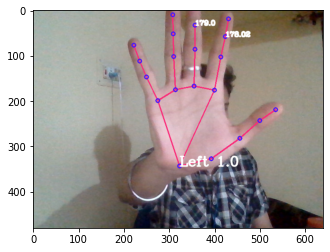

In [89]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# Run the below cell to get the final output!!

- Detect Left & Right Hands and calculate angles between some of the joints

In [30]:
cap = cv2.VideoCapture(0)

with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5, max_num_hands=6) as hands:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB 
        image = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        
        # flip
        # image = cv2.flip(image, 1)
        
        # setting flags
        image.flags.writeable = False
        
        # passing to mediapipe for detections
        results = hands.process(image)
        
        # setting flags
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # printing results
        # print(results.multi_hand_landmarks)
        
        # rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS,
                                         mp_drawing.DrawingSpec(color=(250, 22, 76), thickness=2, circle_radius=4),
                                         mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=4))
        
        
                # using custom function for left and right hands
                if get_label(num, hand, results):
                    text, coord = get_label(num, hand, results)
                    #cv2.putText(image, text, coord, cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
            
            # using custom function to calculate & draw angles to the image from the joint list specified
            draw_finger_angles(image, results, joint_list)
            
            
        
        cv2.imshow('Hand Pose', image)
        
        # Save the image frames
#         cv2.imwrite(
#             os.path.join('Output Images','{}.jpg'.format(uuid.uuid1())), image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break


cap.release()
cv2.destroyAllWindows()
    
    